In [39]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, List
from pathlib import Path
import sys
import pandas as pd
import os
import seaborn as sns

# Get the project root directory
# project_root = Path("./").resolve().parent
project_root = Path("./").resolve().parent.parent


# Add the support_modules directory to Python's path
support_modules_path = os.path.join(project_root, 'src', 'support')
sys.path.append(support_modules_path)

# import customer moduels 
from AggregationModule import OWA, WA, WOWA, PiecewiseLinearInterpolator

In [40]:
w_p1 = [0.4, 0.25, 0.2, 0.075, 0.075]
w_p2 = [0.125, 0.2, 0.35, 0.2, 0.125]
w_p3 = [0.1, 0.15, 0.2, 0.25, 0.3]

In [41]:
vector_p = {
    'history':0.15,
    'geography':0.05,
    'chemistry':0.2,
    'math':0.35,
    'physics':0.25
}

In [42]:
alumn_1 = {
    'chemistry':8,
    'math':6,
    'geography':9,
    'history':9,
    'physics':6
}

In [43]:
d = pd.DataFrame(alumn_1, index=[0])
print(d)

   chemistry  math  geography  history  physics
0          8     6          9        9        6


In [44]:
d.to_dict('records')[0]

{'chemistry': 8, 'math': 6, 'geography': 9, 'history': 9, 'physics': 6}

In [45]:
sorted_dict = dict(sorted(alumn_1.items(), key=lambda item: item[1], reverse=True))

In [46]:
sorted_dict

{'geography': 9, 'history': 9, 'chemistry': 8, 'math': 6, 'physics': 6}

In [47]:
def accumulated_sum(vector: Union[np.ndarray, List]):
    acc = [np.sum(vector[0:i+1]) for i in range(len(vector))]
    acc.insert(0,0)
    return acc

In [48]:
w_acc_p1 = accumulated_sum(w_p1)
w_acc_p2 = accumulated_sum(w_p2)
w_acc_p3 = accumulated_sum(w_p3)
x_points = range(len(w_acc_p1))

In [49]:
w_acc_p1

[0, 0.4, 0.65, 0.8500000000000001, 0.925, 1.0]

In [50]:
w_acc_p2

[0, 0.125, 0.325, 0.675, 0.875, 1.0]

In [51]:
w_acc_p3

[0, 0.1, 0.25, 0.45, 0.7, 1.0]

In [52]:
def plot_owa(vector: Union[np.ndarray, List], DM:str):

    if np.sum(vector) == 1:
        vector = accumulated_sum(vector)
    else:
        pass
        

    x_points = range(len(vector))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.plot(x_points, vector, marker='o')
    plt.ylabel(f'OWA weights {DM} - vector w')
    plt.xlabel('Posición de las notas ordenadas')
    plt.yticks(vector, list(map(lambda x: str(np.round(x,2)), vector)))
    # Add dotted vertical lines from x-axis up to each y point
    ax.vlines(x_points, ymin=0, ymax=vector, linestyle='dotted', color="grey")
    # Add dotted horizontal lines from y-axis to each x point
    ax.hlines(vector, xmin=0, xmax=x_points, linestyle='dotted', color="grey")
    plt.margins(0.01, 0.02)  # Remove default margins
    plt.show()

In [53]:
def plot_wowa_w_star(vector: Union[np.ndarray, List], DM:str):

    if np.sum(vector) == 1:
        vector = accumulated_sum(vector)
    else:
        pass
        
    x_points = accumulated_sum(np.repeat(1/(len(w_acc_p1)-1), (len(w_acc_p1)-1)))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.plot(x_points, vector, marker='o')
    plt.ylabel(f'OWA weights {DM} - vector w')
    plt.xlabel(r'Vector de pesos acumulados $\{ \frac{1}{N} , \frac{2}{N}, ..., \frac{N}{N} \}$')
    plt.yticks(vector, list(map(lambda x: str(np.round(x,2)), vector)))
    # Add dotted vertical lines from x-axis up to each y point
    ax.vlines(x_points, ymin=0, ymax=vector, linestyle='dotted', color="grey")
    # Add dotted horizontal lines from y-axis to each x point
    ax.hlines(vector, xmin=0, xmax=x_points, linestyle='dotted', color="grey")
    plt.title('Construction of the function w*')
    plt.margins(0.01, 0.02)  # Remove default margins
    plt.show()

In [54]:
accumulated_sum(np.repeat(1/(len(w_acc_p1)-1), (len(w_acc_p1)-1)))

[0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0]

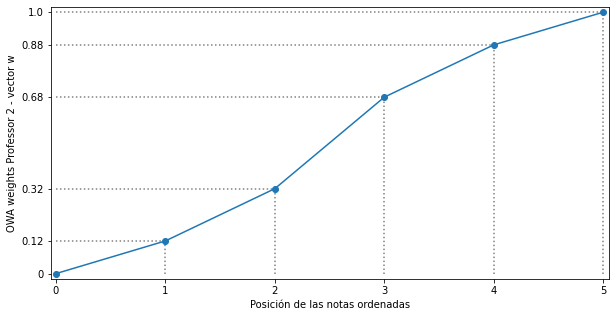

In [55]:
plot_owa(w_acc_p2, DM='Professor 2')

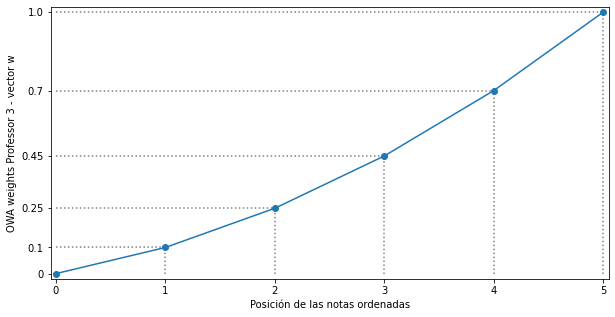

In [56]:
plot_owa(w_acc_p3, DM='Professor 3')

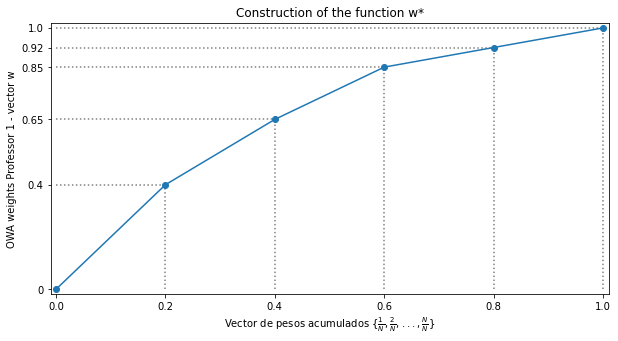

In [57]:
plot_wowa_w_star(w_acc_p1, DM='Professor 1')

In [75]:
def plot_WOWA_single_entry(w_vector, p_vector, alternative):


    # convert the alternative into a dictionary
    if isinstance(alternative, dict):
        pass
    
    elif isinstance(alternative, (pd.DataFrame, pd.Series)):
        alternative = alternative.to_dict('records')[0]

    # establish the order of the alternative keys. In case of ties in alternative values,
    # promote the one having greatest weight according to p_vector
    # Sort the keys based on the values in `alumn_1` (primary) and `vector_p` (secondary)
    sorted_keys = sorted(alternative.keys(), key=lambda k: (-alternative[k], -p_vector[k]))

    # Create the sorted alternative
    sorted_alternative = {key: alternative[key] for key in sorted_keys}

    # now go for the p vector manipulation
    # Reorder weights of p based on the order of values of alternative
    ordered_p_vector = {key: p_vector[key] for key in sorted_keys}
    # afterwards, create the array of ordered weights and cumulative version
    p_list = np.round(list(ordered_p_vector.values()), 3) 
    p_acc = [np.sum(p_list[0:i+1]) for i in range(len(p_list))]
    p_acc.insert(0,0)

    # finally execute w vector manipulation
    if isinstance(w_vector, pd.Series):
        w_weights_vector = np.round(w_vector.to_numpy(), 3)
    
    elif isinstance(w_vector, list):
        w_weights_vector = w_vector

    w_acc = [np.sum(w_weights_vector[0:i+1]) for i in range(len(w_weights_vector))]
    w_acc.insert(0,0)


    # create the coortinates of w* interplation function
    x_points = np.linspace(0,1,len(w_acc))
    y_points = w_acc

    print(f'w acc {w_acc}')
    print(f'p_acc {p_acc}')

    # train the interpolator
    trained_interpolator =PiecewiseLinearInterpolator(x_points, w_acc)


    # Set seaborn style
    sns.set(style="white")  # Use a seaborn style of choice; whitegrid is good for line plots

    # Create the plot with seaborn styling
    fig, ax = plt.subplots(figsize=(20, 10))

    # Plot the main line
    ax.plot(x_points, y_points, linewidth=5, color='b', label='Main Curve')

    # Add dotted vertical lines from x-axis up to each y point
    ax.vlines(x_points, ymin=0, ymax=y_points, linestyle='dotted', color="grey")

    # Add dotted horizontal lines from y-axis to each x point
    ax.hlines(y_points, xmin=0, xmax=x_points, linestyle='dotted', color="grey")

    # Customize ticks and labels
    ax.set_yticks([np.round(y, 3) for y in y_points])  # Set y-ticks based on y_points
    ax.tick_params(axis='y', labelsize=17)
    ax.tick_params(axis='x', labelsize=17)

    # Set labels, title, and margins
    ax.set_ylabel('w vector (OWA-based) weights', fontsize=20, labelpad=15)
    ax.set_xlabel('$p^0$ vector (WA-based) weights', fontsize=20, labelpad=50)
    ax.set_title(r'$\omega^*$ interpolation function construction', fontsize=25, pad=20)
    plt.margins(0, 0)  # Remove default margins
    trans = ax.get_xaxis_transform()



    for i in range(len(p_acc[:-1])):
        # plot the straight line corresponding to the p_sigma_i
        ax.plot([p_acc[i],p_acc[i+1]-0.005],
                [-.08,-.08], 
                color="k", 
                transform=trans, 
                clip_on=False)
        # plot the corresponding labels of the p_sigma_i
        ax.annotate(f'$p_\sigma{i}$', 
                    xy=((p_acc[i]+p_acc[i+1])/2, -0.1), 
                    xycoords=trans, 
                    ha="center", 
                    va="top",
                    fontsize=15)

    # plot the vertical lines p_sigma_i up to the intersection with
    # interpolated function \omega*
    for i in range(len(p_acc)):
        ax.vlines(p_acc[i], 
                  ymin=0, 
                  ymax=trained_interpolator.interpolate(p_acc[i]), 
                  color="red",
                  linewidth=3)

    # plot the horizontal lines from \omega* to the end of the boxplot
    # to highlight the position of the various \omega_i
    for i in range(len(p_acc)):
        ax.hlines(trained_interpolator.interpolate(p_acc[i]), 
                  xmin=p_acc[i], 
                  xmax=1, 
                  color="lightcoral",
                  linewidth=2)

    raw_omega_i = [trained_interpolator.interpolate(x) for x in p_acc]
    yticks_omega_i = [f'w_{i}' for i in range(len(y_points))]
    # Create a secondary y-axis on the right side with different tick positions
    ax_right = ax.twinx()
    right_y_ticks = raw_omega_i  # Define custom y-ticks for the right side
    ax_right.set_yticks(raw_omega_i)
    ax_right.set_yticklabels([f'{tick:.2f}' for tick in right_y_ticks], fontsize=17)  # Format right-side tick labels

    # Optionally, set a label for the right y-axis (or leave it blank)
    ax_right.set_ylabel(r'$\omega_i$ weights of WOWA operator', fontsize=20, labelpad=15)


    # Show the plot
    plt.show()

w acc [0, 0.1, 0.25, 0.45, 0.7, 1.0]
p_acc [0, 0.15, 0.2, 0.4, 0.75, 1.0]


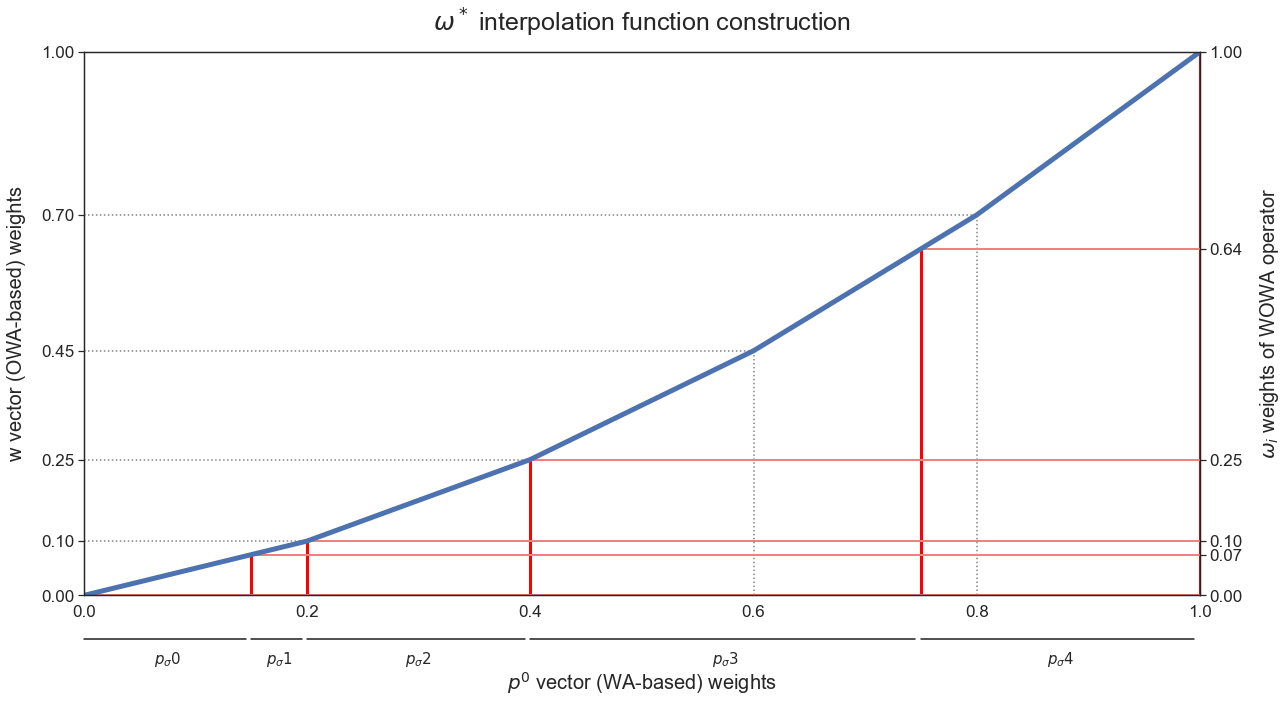

In [78]:
plot_WOWA_single_entry(w_vector=w_p3, p_vector=vector_p, alternative=alumn_1)

In [69]:
w_p1

[0.4, 0.25, 0.2, 0.075, 0.075]

In [70]:
vector_p

{'history': 0.15,
 'geography': 0.05,
 'chemistry': 0.2,
 'math': 0.35,
 'physics': 0.25}

In [72]:
alumn_1

{'chemistry': 8, 'math': 6, 'geography': 9, 'history': 9, 'physics': 6}